# WINE QUALITY - RED

# Upload de Bibliotecas Úteis

In [1]:
##Bibliotecas Básicas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from statistics import mean, median, mode, stdev
from sklearn.model_selection import GridSearchCV
import random as random
import missingno as msno
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#Modelos
from sklearn import tree
import sklearn as sk
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomForestClassifier, 
                              AdaBoostClassifier, 
                              GradientBoostingClassifier)
from imblearn.over_sampling import (SMOTE,
                                    ADASYN)

#Metricas

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (accuracy_score, 
                             auc, 
                             precision_score,
                             recall_score,
                             f1_score, 
                             roc_auc_score,
                             confusion_matrix,
                             cohen_kappa_score,
                             classification_report)

# Análise da Base de Dados 

In [2]:
###Setando seed

seed=1
random.seed(seed)
np.random.seed(seed)

In [3]:
###Carregar base

wine_df = pd.read_csv("winequality-red.csv")

In [4]:
##Visualizar primeiras linhas

wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
##Visualizar últimas linhas

wine_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
wine_df.shape

(1599, 12)

In [7]:
#Verificando as variáveis e não nulos
#Podemos verificar que não temos missing

wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


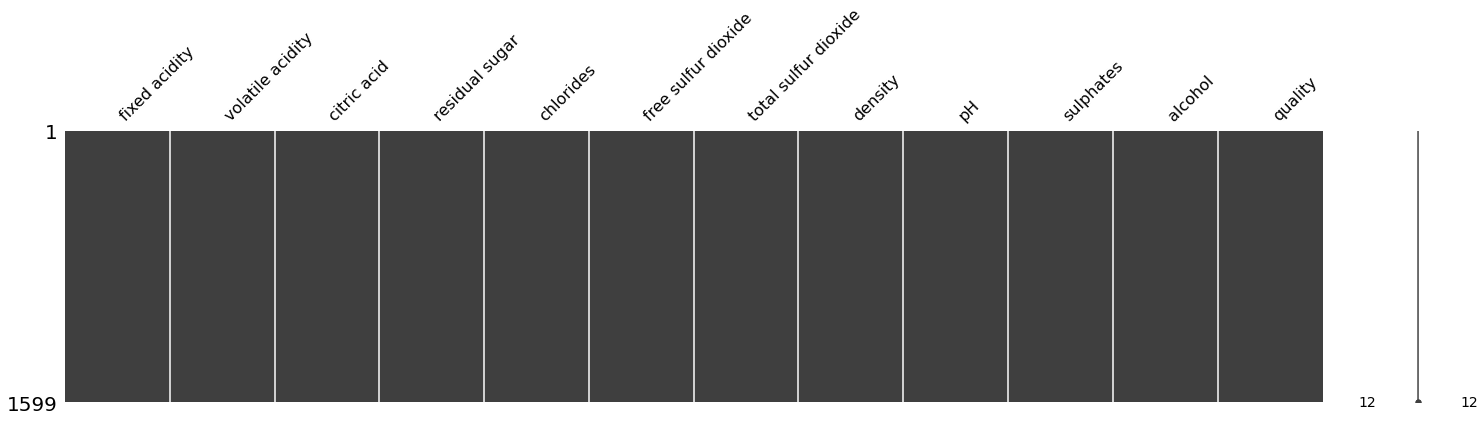

In [8]:
#Verificação de missing values:

msno.matrix(wine_df, figsize=(25,5));

In [9]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Criação da Coluna Target

In [10]:
#Criando coluna target

def cria_target(x):
    
    if x > 6.5:
        return 1
    else:
        return 0

In [11]:
wine_df["score"] = list(map(cria_target, wine_df.quality))

In [12]:
#Checando se coluna foi criada com sucesso

wine_df[wine_df['quality'] < 6.5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,score
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [13]:
#Checando se coluna foi criada com sucesso

wine_df[wine_df['quality'] > 6.5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,score
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.00,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.50,7,1
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.50,7,1
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.70,7,1
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.50,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,7.4,0.25,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.90,7,1
1544,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20,7,1
1549,7.4,0.36,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.40,8,1
1555,7.0,0.56,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,7,1


In [14]:
#Removendo a coluna quality

wine_df= wine_df.drop('quality',axis=1)

# Divisão Entre Treino e Teste

In [15]:
#Dividindo entre treino e teste

train_set, test_set = train_test_split(wine_df, test_size = 0.2, stratify = wine_df['score'], random_state = seed)

train_set_copy = train_set.copy() #treino
test_set_copy = test_set.copy() #teste

In [16]:
#Verificando se taxa de 20% para teste foi corretamente aplicada

len(test_set_copy['score'])/len(wine_df['score'])

0.20012507817385866

In [17]:
# Verificando se stratify funcionou no treino

train_set_copy['score'].value_counts()/len(train_set_copy['score'])

0    0.863956
1    0.136044
Name: score, dtype: float64

In [18]:
# Verificando se stratify funcionou no teste

test_set_copy['score'].value_counts()/len(test_set_copy['score'])

0    0.865625
1    0.134375
Name: score, dtype: float64

In [19]:
#Verificando shape de treino e teste

print(train_set_copy.shape)
print(test_set_copy.shape)

(1279, 12)
(320, 12)


# Análise Exploratória

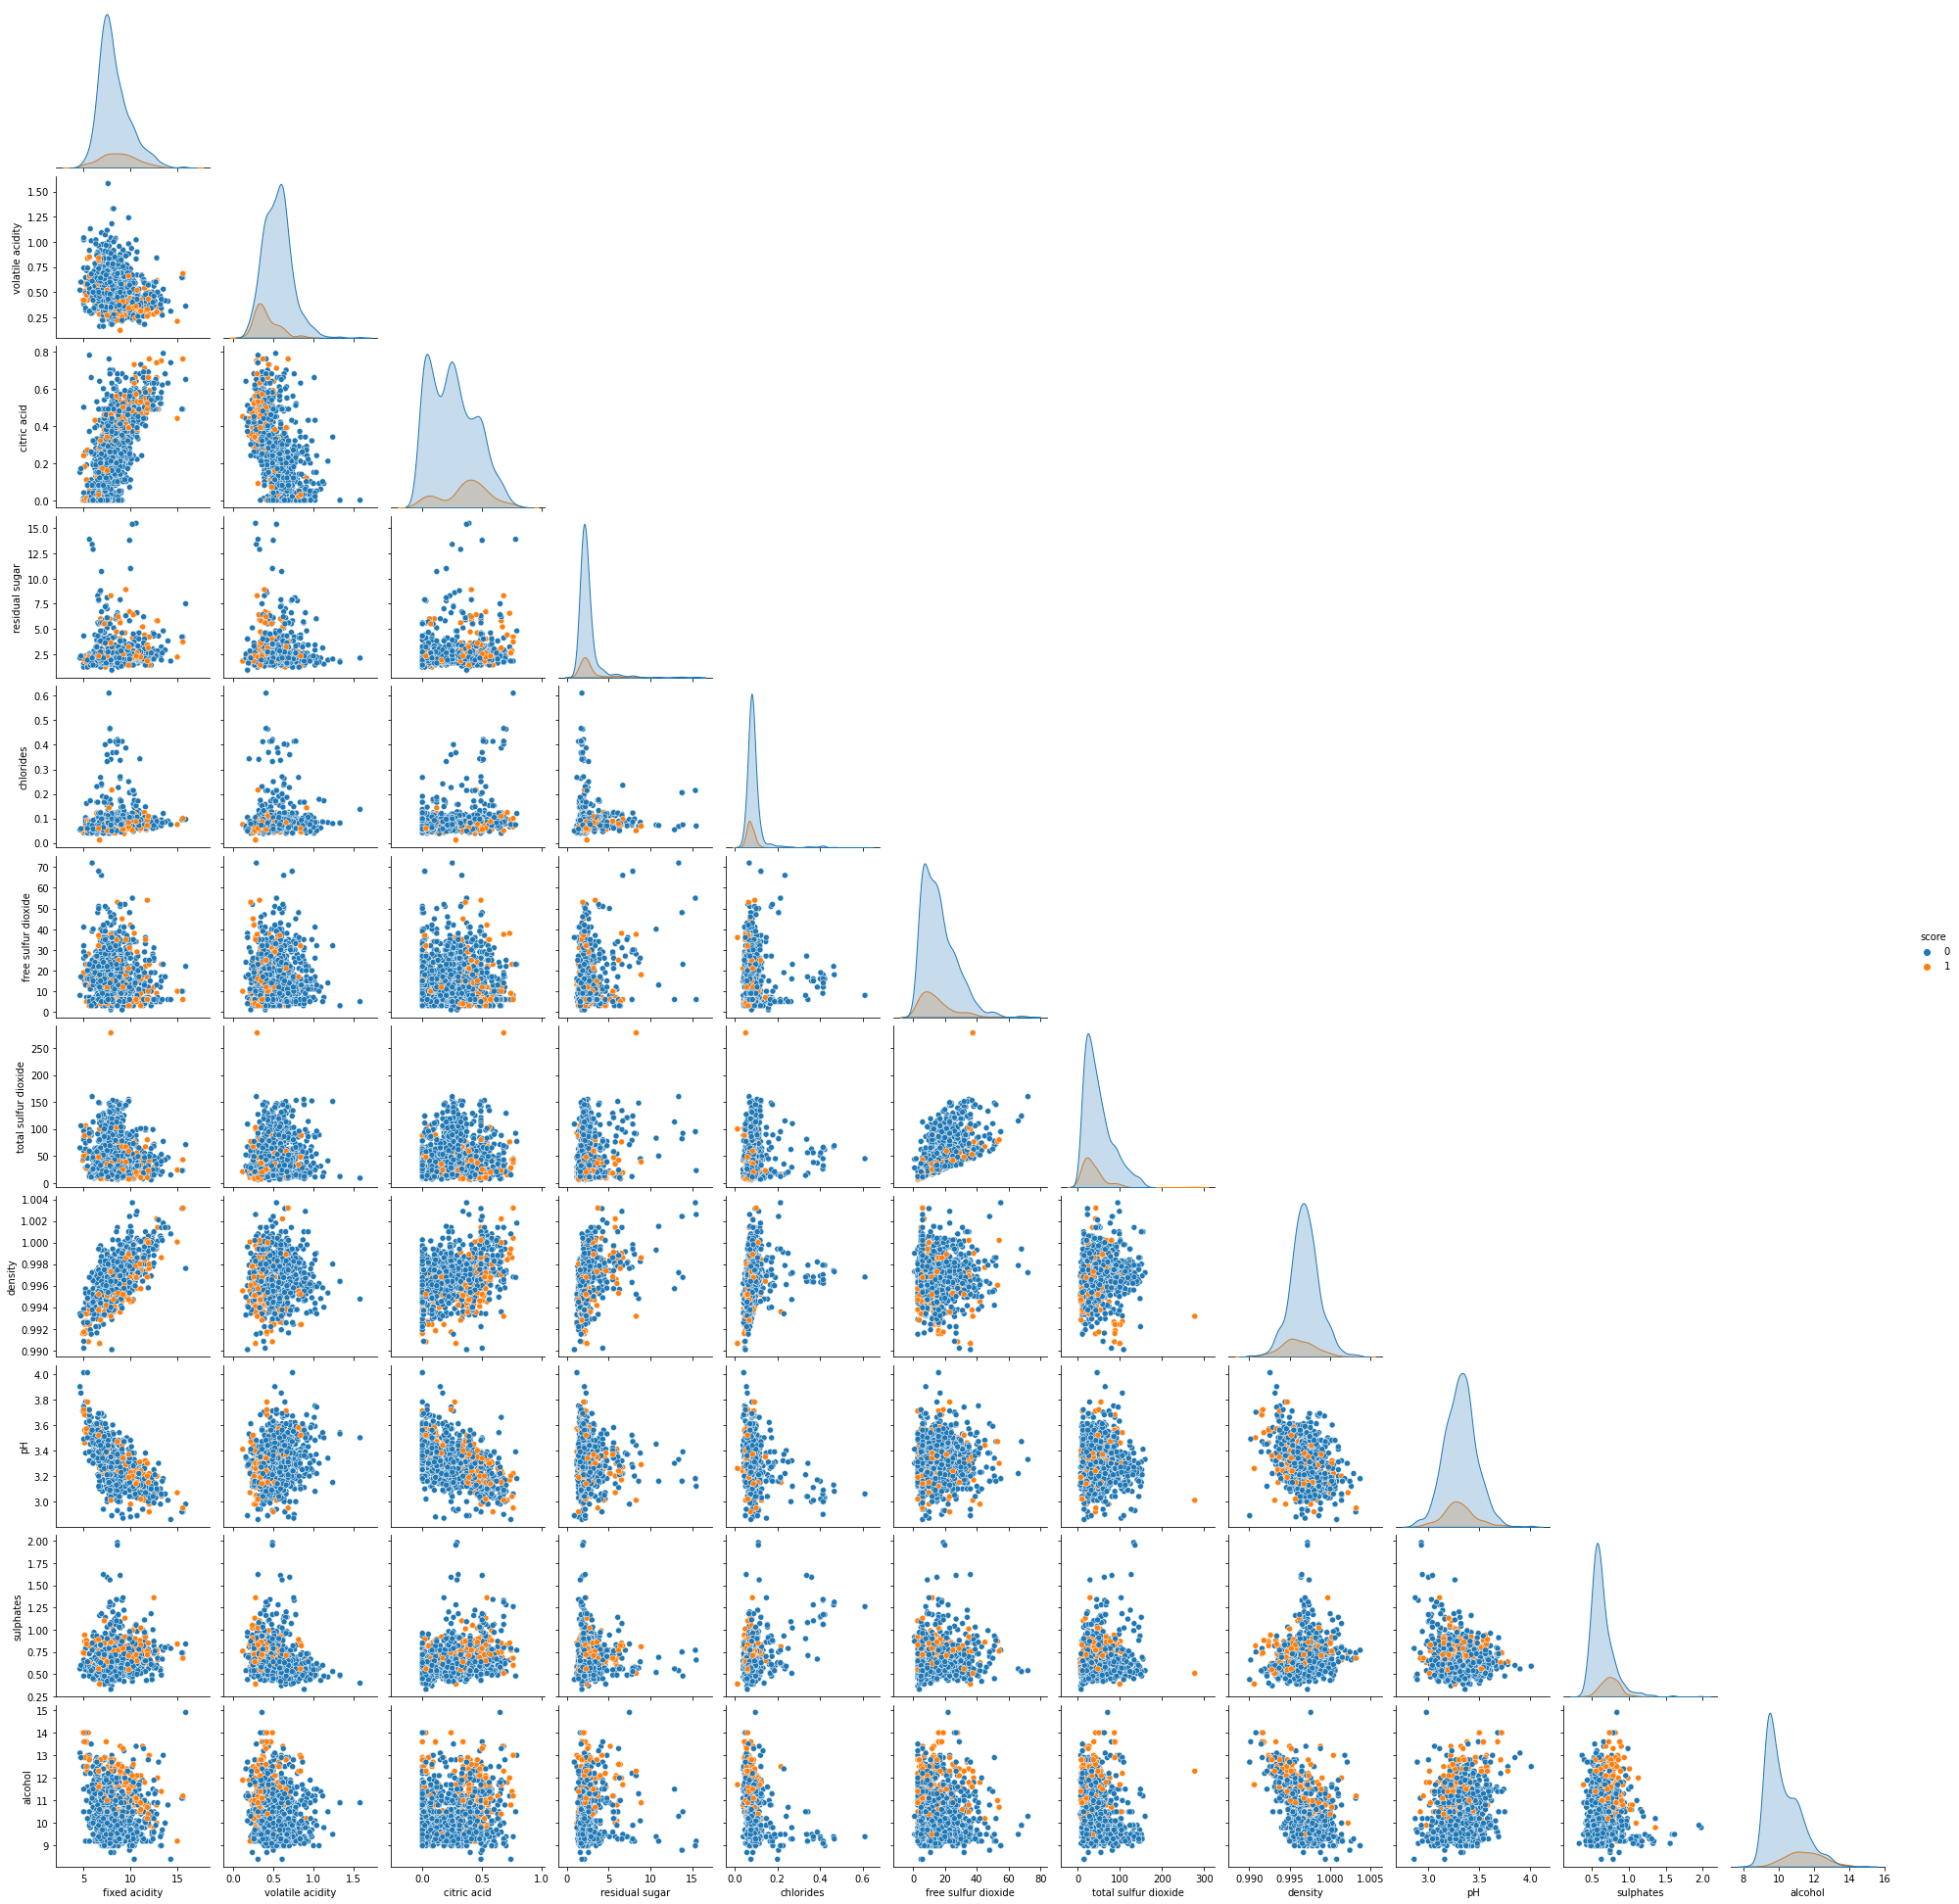

In [20]:
graph = sns.pairplot(train_set_copy, hue="score", height = 2.5, corner=True)

plt.show()

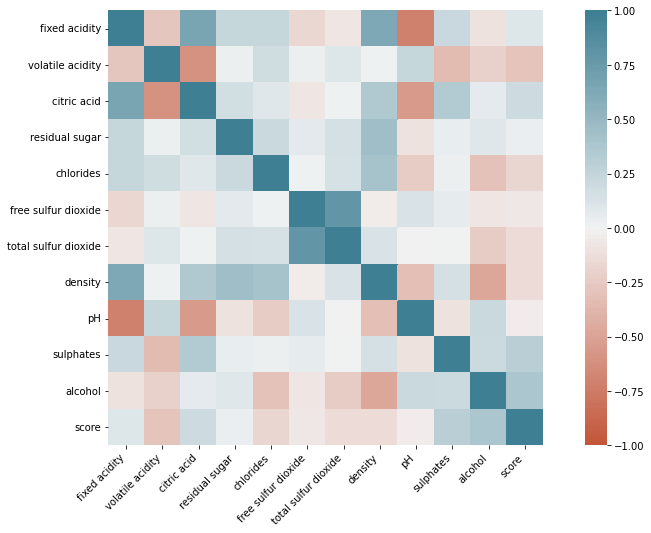

In [21]:
#Matriz de Correlação

corr = train_set_copy.corr(method = 'spearman')

plt.figure(figsize = (15,8))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [22]:
# Correlação entre os atributos
train_set_copy.corr()
train_set_copy.corr().style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,score
fixed acidity,1.000000,-0.260448,0.670952,0.117964,0.086648,-0.137201,-0.100885,0.673764,-0.689476,0.185806,-0.087251,0.100531
volatile acidity,-0.260448,1.000000,-0.548334,-0.004007,0.068589,0.002310,0.100546,0.008302,0.239165,-0.277207,-0.185287,-0.271847
citric acid,0.670952,-0.548334,1.000000,0.134995,0.194923,-0.064790,0.030379,0.371846,-0.538675,0.320279,0.084033,0.188881
residual sugar,0.117964,-0.004007,0.134995,1.000000,0.049056,0.204852,0.204874,0.373174,-0.080369,0.004158,0.024394,0.024879
chlorides,0.086648,0.068589,0.194923,0.049056,1.000000,0.006681,0.056110,0.192180,-0.260491,0.374228,-0.232846,-0.116658
free sulfur dioxide,-0.137201,0.002310,-0.064790,0.204852,0.006681,1.000000,0.668401,-0.003964,0.078114,0.056108,-0.066841,-0.057141
total sulfur dioxide,-0.100885,0.100546,0.030379,0.204874,0.056110,0.668401,1.000000,0.081784,-0.055469,0.043758,-0.202112,-0.133423
density,0.673764,0.008302,0.371846,0.373174,0.192180,-0.003964,0.081784,1.000000,-0.352853,0.136187,-0.499952,-0.150665
pH,-0.689476,0.239165,-0.538675,-0.080369,-0.260491,0.078114,-0.055469,-0.352853,1.000000,-0.191150,0.237023,-0.026961
sulphates,0.185806,-0.277207,0.320279,0.004158,0.374228,0.056108,0.043758,0.136187,-0.191150,1.000000,0.095660,0.216947


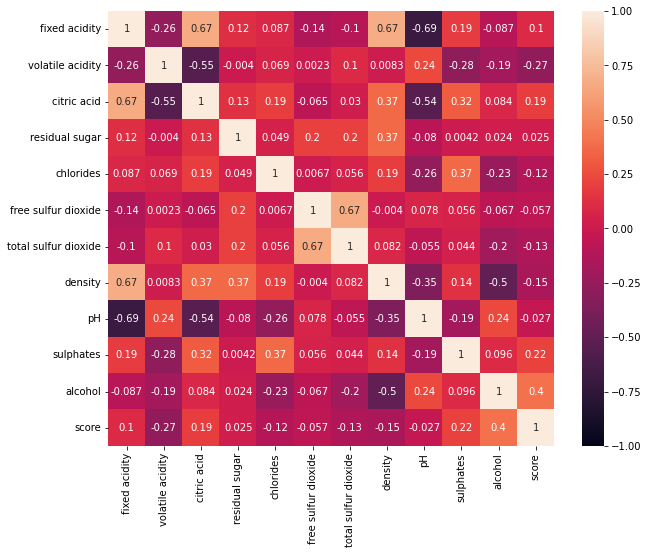

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(train_set_copy.corr(), vmin=-1, vmax=1, annot=train_set_copy.corr())
plt.show()

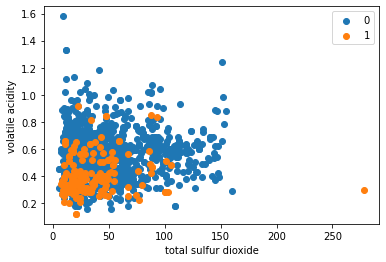

In [24]:
# Relação entre 2 variáveis e a classe
groups = train_set_copy.groupby("score")
for name, group in groups:
  plt.scatter(group["total sulfur dioxide"], group["volatile acidity"], label=name)
plt.xlabel("total sulfur dioxide")
plt.ylabel("volatile acidity")
plt.legend();

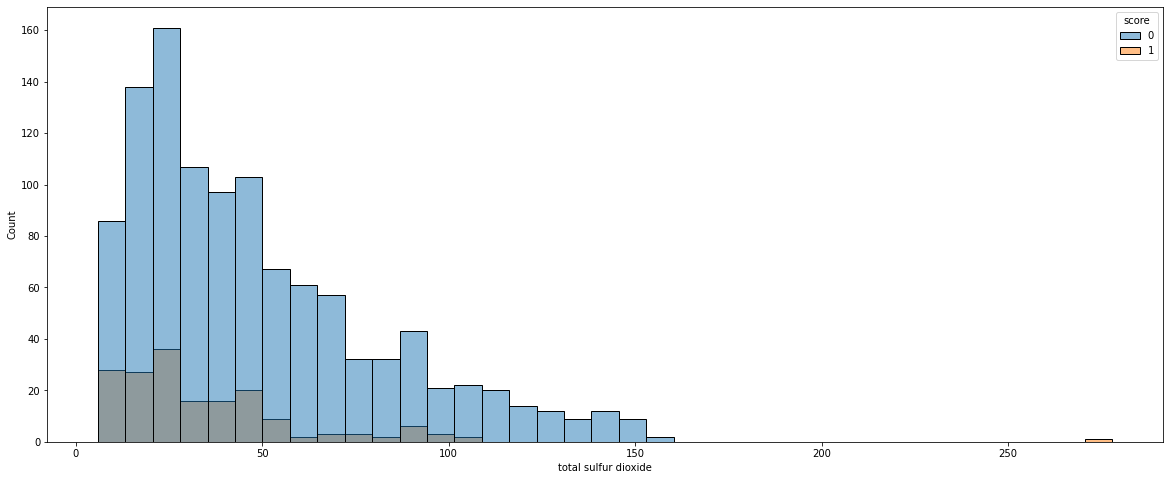

In [25]:
plt.figure(figsize=(20,8))
#sns.countplot(data=train_set_copy, x='total sulfur dioxide', hue='score', palette='Set2')
sns.histplot(data = train_set_copy, x = 'total sulfur dioxide', hue = "score")
plt.show()

In [26]:
train_set_copy.shape

(1279, 12)

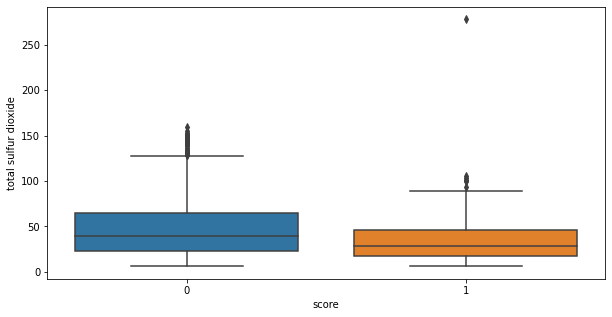

In [27]:
#boxplot
plt.figure(figsize=(10,5))
sns.boxplot(x="score", y="total sulfur dioxide", data=train_set_copy)
plt.show()

# Pré Processamento

In [28]:
#Separando a label das features em entrada(X) e saída(y)

x_treino = train_set_copy.loc[:,train_set_copy.columns != 'score']  # Entrada - x
y_treino = train_set_copy.score    # Saída - y

x_teste = test_set_copy.loc[:,test_set_copy.columns != 'score']  # Entrada - x
y_teste = test_set_copy.score    # Saída - y


In [29]:
#Verificando o shape do label e das features em treino e teste

print(x_treino.shape)
print(y_treino.shape)
print(x_teste.shape)
print(y_teste.shape)

(1279, 11)
(1279,)
(320, 11)
(320,)


In [30]:
#Exibindo os dados antes da normalização
x_treino.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
557,15.6,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1
173,7.4,0.620,0.05,1.9,0.068,24.0,42.0,0.99610,3.42,0.57,11.5


In [31]:
scaler = StandardScaler().fit(x_treino) # gero o modelo de pré-processamento no treino

x_treino_norm = scaler.transform(x_treino) # aplico o modelo no treino
x_teste_norm = scaler.transform(x_teste)   # aplico o modelo no teste

x_treino = pd.DataFrame(x_treino_norm, columns = x_treino.columns)
x_teste = pd.DataFrame(x_teste_norm, columns = x_teste.columns)

In [32]:
#Verificando se normalização ocorreu corretamente na base de treino

x_treino

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,4.210048,0.631269,1.149260,1.120673,0.152145,-0.573033,-0.731268,3.375802,-2.518586,0.499536,0.631345
1,-0.528436,0.491456,-1.125492,-0.436239,-0.406912,0.745742,-0.150569,-0.333149,0.696705,-0.519072,1.005393
2,0.280573,-1.130376,0.735669,2.271434,-0.303383,-0.855627,-1.036899,-0.080625,-0.074965,-0.219481,1.566464
3,-0.066145,0.379605,-0.505105,-0.165472,-0.324089,-0.478835,0.796887,-0.227931,-0.718023,-1.238089,-1.051868
4,1.205156,0.239792,1.769647,0.037604,-0.241266,-0.478835,-0.700705,1.718611,-0.975246,0.199946,-1.332404
...,...,...,...,...,...,...,...,...,...,...,...
1274,-0.412863,-0.571124,0.683970,0.105295,-0.117031,-0.949825,-1.098025,-0.711936,0.825317,-0.698826,1.659975
1275,-0.239504,-1.018526,-0.298310,-0.436239,-0.303383,2.818101,1.683216,-0.175322,-0.267882,-0.459153,-0.864844
1276,-0.875154,0.603306,-1.383987,0.105295,0.731908,-0.102042,-0.425637,-0.711936,0.825317,-0.159563,0.818369
1277,0.396146,0.267755,-0.091514,0.172987,-0.261971,-0.667231,1.744342,0.555947,-0.525106,-0.519072,-0.677821


In [33]:
#Verificando se normalização ocorreu corretamente na base de teste

x_teste

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.586222,-0.794825,0.218680,-0.097780,-0.282677,-0.667231,-0.028317,-0.280540,0.632399,-0.698826,-0.958356
1,-0.701795,1.246446,-0.608503,-0.503931,0.400615,0.368949,1.133081,-0.422585,-0.782329,-0.938498,-0.864844
2,1.725233,-0.962601,2.028141,-0.097780,0.731908,-1.232420,-1.189714,-0.164800,-0.718023,-0.758744,1.379440
3,4.152261,0.631269,1.149260,1.120673,0.152145,-0.573033,-0.731268,3.375802,-2.518586,0.499536,0.631345
4,0.453933,1.302371,-1.177191,-0.639315,-0.199854,-1.138222,-1.006336,0.666426,-0.139271,-0.698826,-0.677821
...,...,...,...,...,...,...,...,...,...,...,...
315,-0.123931,0.239792,-0.246611,-0.300856,-0.220560,-0.384636,0.552382,-0.017494,-0.139271,-0.878580,-1.145380
316,-0.701795,-0.794825,-0.763600,-0.300856,-0.469030,-0.196240,-0.700705,-2.216560,-0.074965,-0.758744,2.688606
317,-0.701795,-0.571124,0.787368,2.000667,-0.344795,1.122534,2.477857,0.298162,0.696705,0.319782,0.070274
318,-0.066145,-1.074451,0.580572,-0.030088,-0.158442,-0.384636,0.307877,0.561208,-0.074965,-1.118252,-1.332404


In [34]:
# Balanceamento

sampling_strategy = 'auto'

smote = SMOTE(sampling_strategy = sampling_strategy)

x_treino, y_treino = smote.fit_resample(x_treino, y_treino)

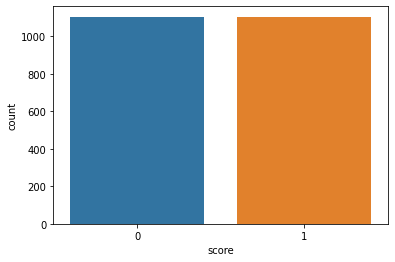

In [35]:
y_treino = pd.DataFrame(y_treino)
sns.countplot(x="score", data=y_treino)
plt.show()

# Treinando Modelos - Machine Learning

In [36]:
# Para exportar os resultados, será criado um dataframe que será preenchido com cada resultado

modelos = ['Arvore_de_Decisão', 'Arvore_de_Decisão-GridSearch','Radom_Forest','Radom_Forest-GridSearch','SVM','SVM-GridSearch','KNN','KNN-GridSearch','Logistic_Regression','Logistic_Regression-GridSearch']
df = pd.DataFrame(columns=['modelos','Acurácia','Kappa','F1','confMatrix'])
df['modelos'] = modelos


## Arvore de decisão

In [37]:
# treinar modelo

def train(x_treino, y_treino, seed):
  model = DecisionTreeClassifier( min_samples_leaf=5, random_state=seed) 
  model.fit(x_treino, y_treino);
  return model

model = train(x_treino, y_treino, seed)

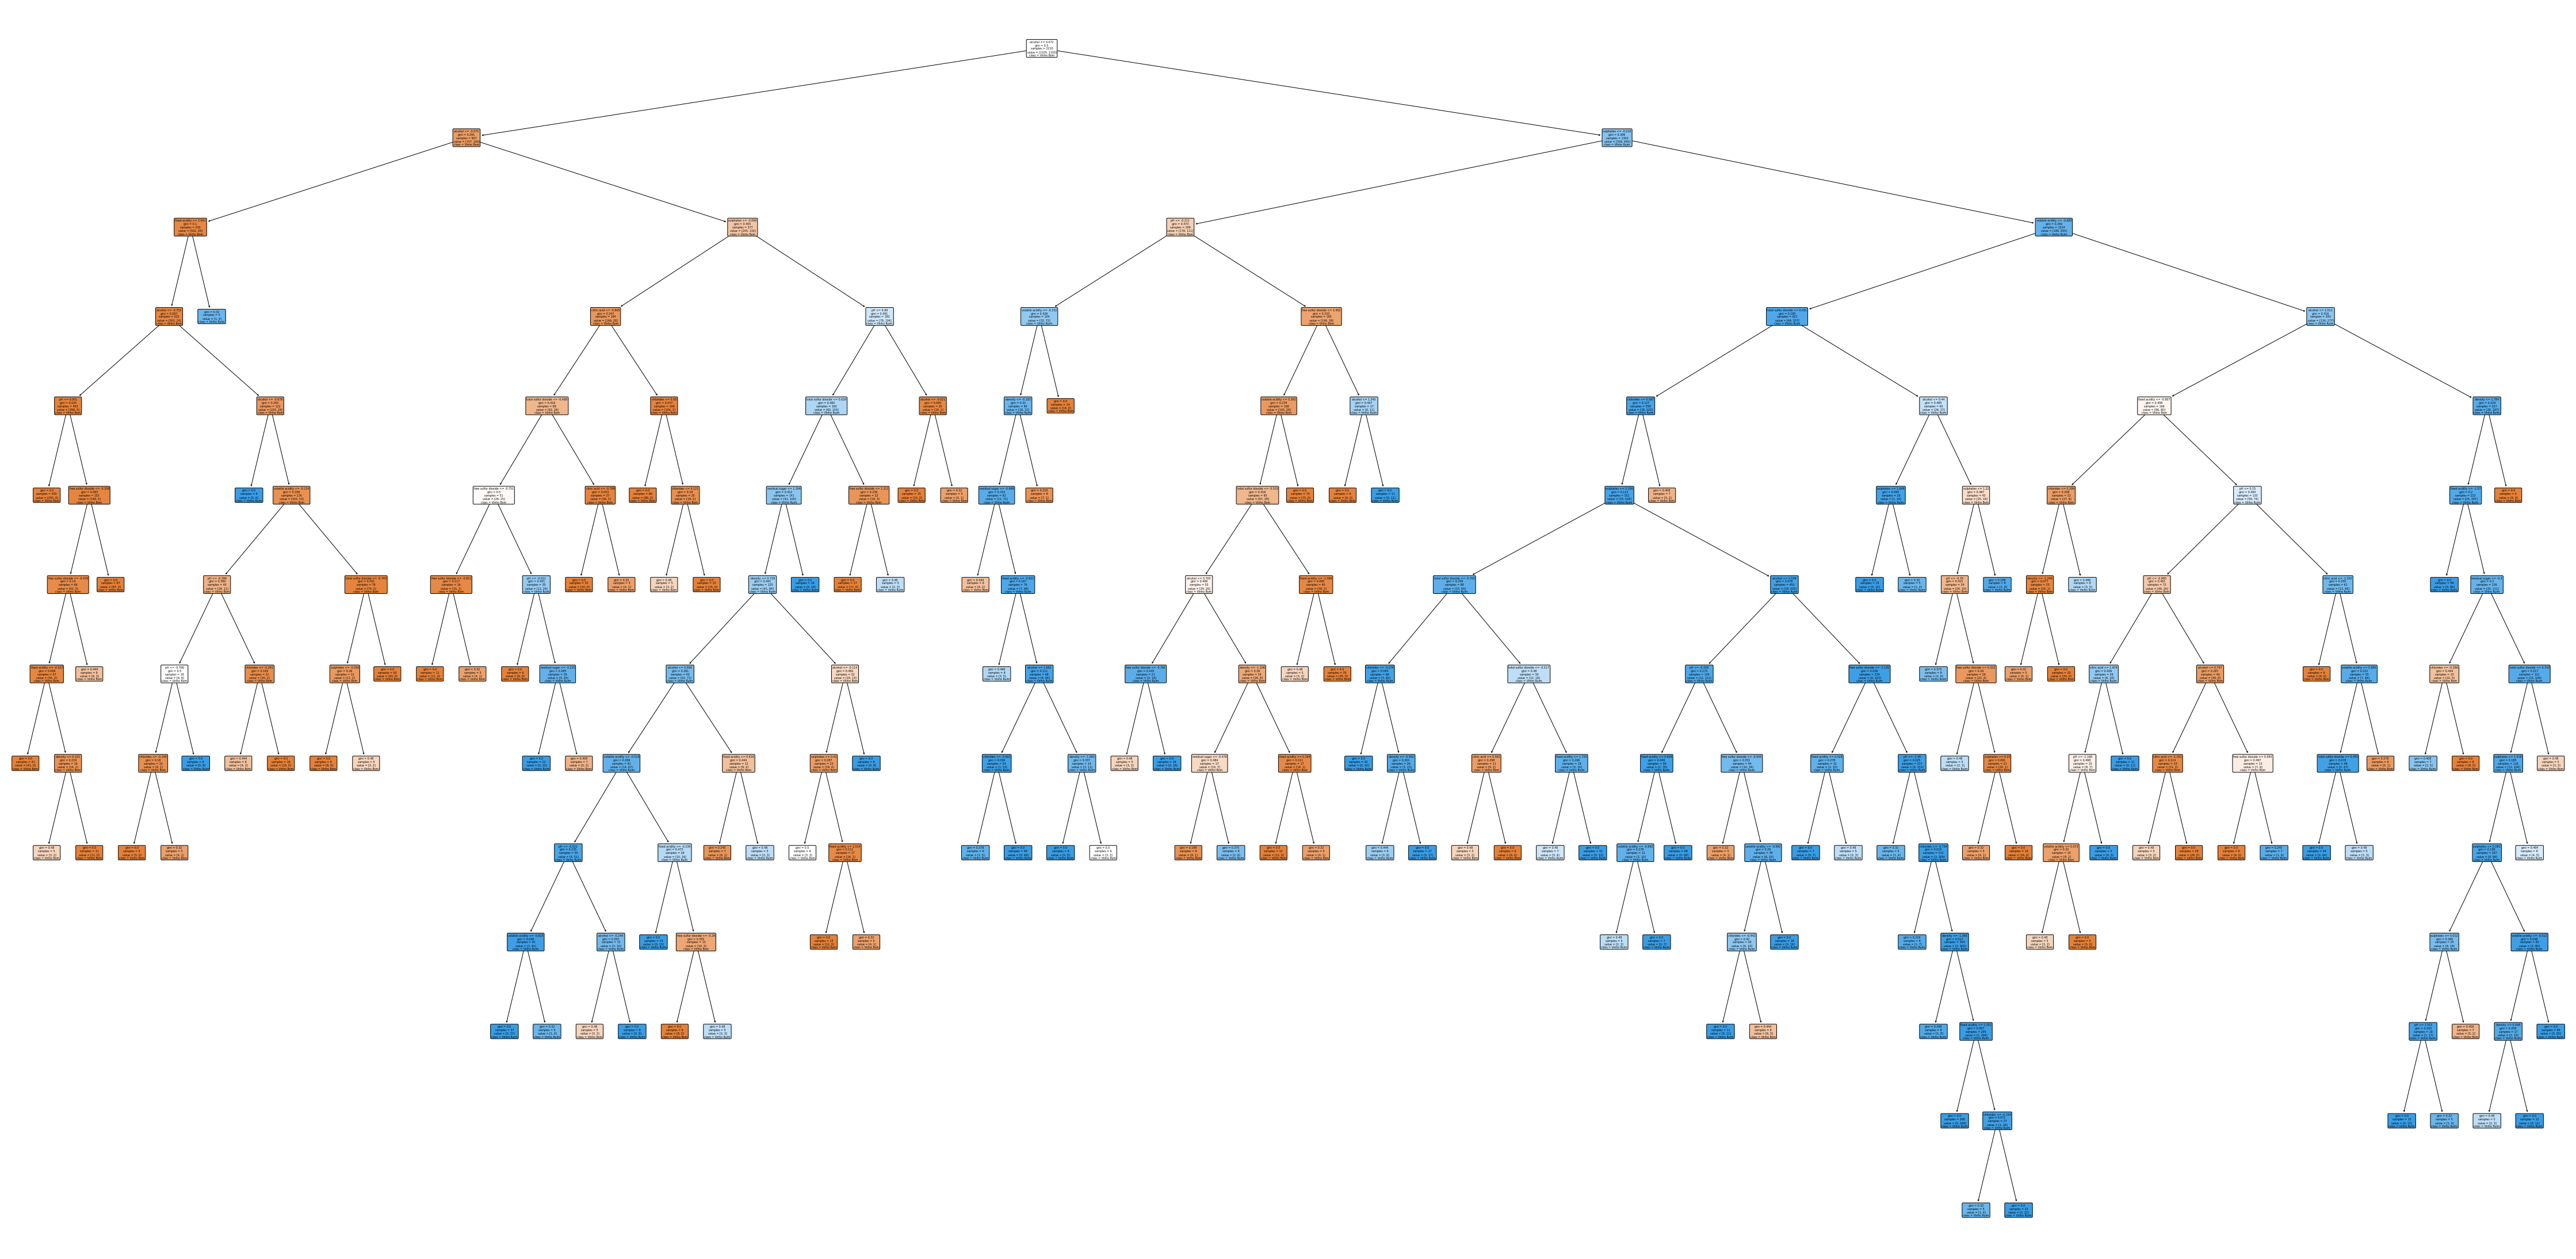

In [38]:
# Visualização gráfica da árvore de decisão

plt.subplots(figsize=(80, 40)) # Definir tamanho da imagem a ser gerada
tree.plot_tree(model, class_names=['Vinho Bom', 'Vinho Ruim'], feature_names=x_treino.columns,
               filled=True, rounded=True); # plota a árvore

plt.savefig('tree.png') # Salva a imagem

In [39]:
# profundidade da árvore
model.get_depth()

13

In [40]:
# Importância dos Atributos - Alcool é o mais importante

model.feature_importances_

array([0.03361431, 0.0600865 , 0.02254907, 0.02428501, 0.02302155,
       0.03824223, 0.06114422, 0.0307112 , 0.0970885 , 0.144037  ,
       0.46522042])

Resultados de Teste
Acurácia:  0.821875
Kappa:  0.4040773653946681
F1:  0.5043478260869566


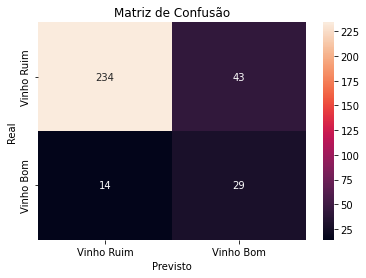

In [41]:
def predict_and_evaluate(model, x_teste, y_teste, i):

  # inferência do teste
  saida_pred = model.predict(x_teste) 

  # Acurácia
  accuracy = accuracy_score(y_teste, saida_pred)
  print('Acurácia: ', accuracy)
  df['Acurácia'][i] = accuracy

  # Kappa
  kappa = cohen_kappa_score(y_teste, saida_pred)
  print('Kappa: ', kappa)
  df['Kappa'][i] = kappa

  # F1
  f1 = f1_score(y_teste, saida_pred)
  print('F1: ', f1)
  df['F1'][i] = f1

  # Matriz de confusão
  confMatrix = confusion_matrix(y_teste, saida_pred)
  df['confMatrix'][i] = confMatrix

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Previsto')
  plt.ylabel('Real')
  plt.title('Matriz de Confusão')

  # Colocar os nomes
  ax.xaxis.set_ticklabels(['Vinho Ruim', 'Vinho Bom']) 
  ax.yaxis.set_ticklabels(['Vinho Ruim', 'Vinho Bom'])
  plt.show()

#print('Resultados de Treino')
#predict_and_evaluate(model, x_treino, y_treino)
print('Resultados de Teste')
predict_and_evaluate(model, x_teste, y_teste,0)


In [42]:
# Definir parâmetros a serem utilizados
tuned_parameters = [{'max_depth': [2,4,5,6,8,9,10,12],
                      'min_samples_leaf': [1, 2, 3, 4, 5, 8, 10]}]

# Executar o grid search
model = GridSearchCV(RandomForestClassifier(n_jobs=50, verbose=0), tuned_parameters, scoring='f1')
model.fit(x_treino, y_treino);

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 

In [43]:
model.best_params_

{'max_depth': 12, 'min_samples_leaf': 1}

Resultados de Teste
Acurácia:  0.871875
Kappa:  0.535870949483515
F1:  0.6095238095238095


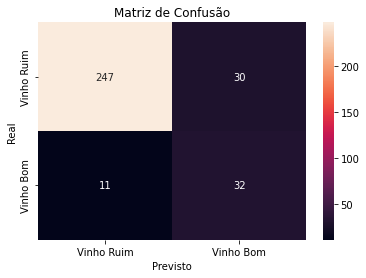

In [44]:
#print('Resultados de Treino')
#predict_and_evaluate(model, x_treino, y_treino)
print('Resultados de Teste')
predict_and_evaluate(model, x_teste, y_teste,1)

## Random Forest

In [45]:
# treinar modelo

def train(X_train, y_train, seed):
  model = RandomForestClassifier(min_samples_leaf=5, random_state=seed) # tente mudar parâmetro para evitar overfitting
  model.fit(X_train, y_train);
  return model

model = train(x_treino, y_treino, seed)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Resultados de Teste
Acurácia:  0.88125
Kappa:  0.5802554366586123
F1:  0.6481481481481481


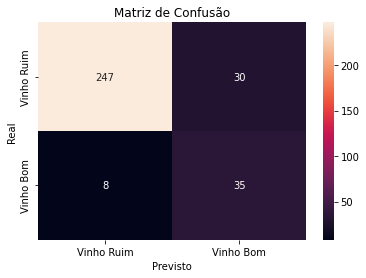

In [46]:
def predict_and_evaluate(model, X_test, y_test,i):

  y_pred = model.predict(X_test) #inferência do teste

  # Acurácia
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)
  df['Acurácia'][i] = accuracy

  # Kappa
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)
  df['Kappa'][i] = kappa

  # F1
  f1 = f1_score(y_test, y_pred)
  print('F1: ', f1)
  df['F1'][i] = f1

  # Matriz de confusão
  confMatrix = confusion_matrix(y_test, y_pred)
  df['confMatrix'][i] = confMatrix
  
  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Previsto')
  plt.ylabel('Real')
  plt.title('Matriz de Confusão')

  # Colocar os nomes
  ax.xaxis.set_ticklabels(['Vinho Ruim', 'Vinho Bom']) 
  ax.yaxis.set_ticklabels(['Vinho Ruim', 'Vinho Bom'])
  plt.show()

#print('Resultados de Treino')
#predict_and_evaluate(model, x_treino, y_treino)
print('Resultados de Teste')
predict_and_evaluate(model, x_teste, y_teste,2)

In [47]:
# Rodando o Grid Search para o modelo Random Forest
# Definir parâmetros a serem utilizados
tuned_parameters = [{'n_estimators': [20, 50, 100, 150, 200, 300, 400, 500],
                     'max_features': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]}]

# Executar o grid search
model = GridSearchCV(RandomForestClassifier(n_jobs=50, verbose=0), tuned_parameters, scoring='f1')
model.fit(x_treino, y_treino);

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 

In [48]:
model.best_params_

{'max_features': 0.1, 'n_estimators': 150}

Resultados de Teste
Acurácia:  0.890625
Kappa:  0.5756932868616457
F1:  0.6391752577319588


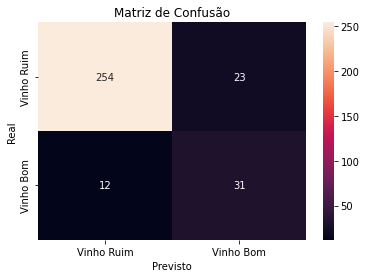

In [49]:
#print('Resultados de Treino')
#predict_and_evaluate(model, x_treino, y_treino)
print('Resultados de Teste')
predict_and_evaluate(model, x_teste, y_teste,3)

## SVM

In [50]:
# treinar modelo

def trainSVM(X_train, y_train, seed):
  model = SVC(random_state=seed)
  model.fit(X_train, y_train)
  return model

model = trainSVM(x_treino, y_treino, seed)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Resultados de Teste
Acurácia:  0.834375
Kappa:  0.5062878435025617
F1:  0.5954198473282443


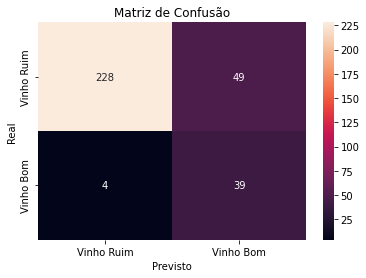

In [51]:
def predict_and_evaluate(X_test, y_test,i):

  y_pred = model.predict(X_test) #inferência do teste

  # Acurácia
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)
  df['Acurácia'][i] = accuracy

  # Kappa
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)
  df['Kappa'][i] = kappa

  # F1
  f1 = f1_score(y_test, y_pred)
  print('F1: ', f1)
  df['F1'][i] = f1

  # Matriz de confusão
  confMatrix = confusion_matrix(y_test, y_pred)
  df['confMatrix'][i] = confMatrix

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Previsto')
  plt.ylabel('Real')
  plt.title('Matriz de Confusão')

  # Colocar os nomes
  ax.xaxis.set_ticklabels(['Vinho Ruim', 'Vinho Bom']) 
  ax.yaxis.set_ticklabels(['Vinho Ruim', 'Vinho Bom'])
  plt.show()

#print('Resultados de Treino')
#predict_and_evaluate(x_treino, y_treino )
print('Resultados de Teste')
predict_and_evaluate(x_teste, y_teste,4)

In [52]:
# Rodando o Grid Search para o modelo SVM
# Set the parameters by cross-validation


tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]
                     
print("# Tuning hyper-parameters for F1 score")
print()

model = GridSearchCV(SVC(), tuned_parameters, scoring='f1')
model.fit(x_treino, y_treino)

y_pred = model.predict(x_teste)
print(classification_report(y_teste, y_pred))
print()

# Tuning hyper-parameters for F1 score



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

              precision    recall  f1-score   support

           0       0.97      0.78      0.86       277
           1       0.37      0.86      0.52        43

    accuracy                           0.79       320
   macro avg       0.67      0.82      0.69       320
weighted avg       0.89      0.79      0.82       320




In [53]:
model.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Resultados de Teste
Acurácia:  0.7875
Kappa:  0.4107133185289499
F1:  0.5211267605633804


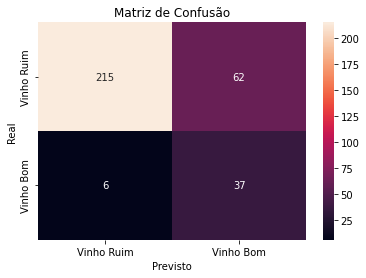

In [54]:
#print('Resultados de Treino')
#predict_and_evaluate(x_treino, y_treino)
print('Resultados de Teste')
predict_and_evaluate(x_teste, y_teste,5)

## KNN

In [55]:
# treinar modelo

def train(X_train, y_train, n_neighbors=5):
  model = KNeighborsClassifier(n_neighbors=n_neighbors)
  model.fit(X_train, y_train);
  y_pred = model.predict(x_teste) #inferência do teste

  return model, y_pred

model, y_pred = train(x_treino, y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Acurácia:  0.809375
Kappa:  0.4611307420494699
F1:  0.8356342171771566


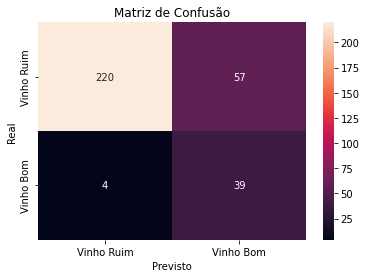

In [56]:
def evaluate(y_test, y_pred,i):  

  # Acurácia
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)
  df['Acurácia'][i] = accuracy

  # Kappa
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)
  df['Kappa'][i] = kappa

  # F1
  f1 = f1_score(y_test, y_pred, average='weighted')
  print('F1: ', f1)
  df['F1'][i] = f1

  # Matriz de confusão
  confMatrix = confusion_matrix(y_test, y_pred)
  df['confMatrix'][i] = confMatrix

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Previsto')
  plt.ylabel('Real')
  plt.title('Matriz de Confusão')

  # Colocar os nomes
  ax.xaxis.set_ticklabels(['Vinho Ruim', 'Vinho Bom']) 
  ax.yaxis.set_ticklabels(['Vinho Ruim', 'Vinho Bom'])
  plt.show()

evaluate(y_teste, y_pred,6)

In [57]:
# Parâmetros a serem testados
tuned_parameters = [{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]}]

# Executar o grid search
model = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='f1_weighted')
model.fit(x_treino, y_treino)

y_pred = model.predict(x_teste)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Acurácia:  0.88125
Kappa:  0.551258395453539
F1:  0.8880231481481482


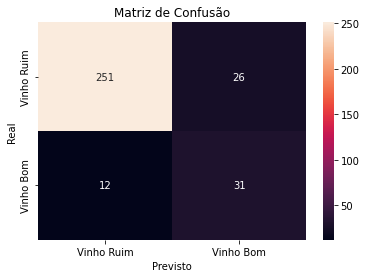

In [58]:
evaluate(y_teste, y_pred,7)

In [59]:
# Como o nosso modelo é binário para classificação, o corte ideal é em 0.5 o que não melhoraria a classificação
probabilities = model.predict_proba(x_teste)
probabilities

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.5, 0.5],
       [0. , 1. ],
       [1. , 0. ],
       [0.5, 0.5],
       [0. , 1. ],
       [0.5, 0.5],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. ,

## Regressão Logística

In [60]:
# treinar modelo

def train_and_predict(X_train, y_train, X_test):
  model = LogisticRegression()  # max_iter=10000
  model.fit(X_train, y_train);
  y_pred = model.predict(X_test) # inferência do teste

  return model, y_pred

model, y_pred = train_and_predict(x_treino, y_treino, x_teste)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia:  0.790625
Kappa:  0.4081272084805653
F1:  0.8194670909978605


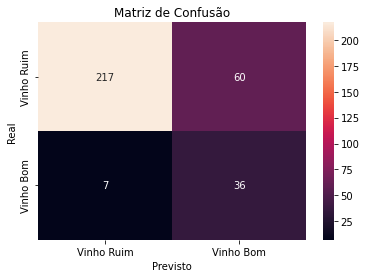

In [61]:
def evaluate(y_test, y_pred,i):  

  # Acurácia
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)
  df['Acurácia'][i] = accuracy

  # Kappa
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)
  df['Kappa'][i] = kappa

  # F1
  f1 = f1_score(y_test, y_pred, average='weighted')
  print('F1: ', f1)
  df['F1'][i] = f1

  # Matriz de confusão
  confMatrix = confusion_matrix(y_test, y_pred)
  df['confMatrix'][i] = confMatrix

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Previsto')
  plt.ylabel('Real')
  plt.title('Matriz de Confusão')

  # Colocar os nomes
  ax.xaxis.set_ticklabels(['Vinho Ruim', 'Vinho Bom']) 
  ax.yaxis.set_ticklabels(['Vinho Ruim', 'Vinho Bom'])
  plt.show()

evaluate(y_teste, y_pred,8)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Acurácia:  0.78125
Kappa:  0.3933813573092131
F1:  0.8120846060297529


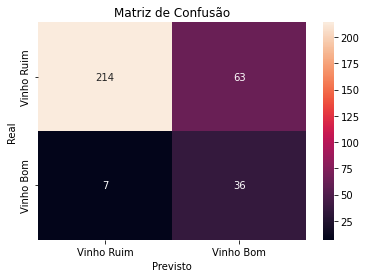

In [62]:
# Parâmetros a serem testados
tuned_parameters = [{'C': [0.1, 1.0, 10]}]

# Executar o grid search
model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring='f1_weighted')
model.fit(x_treino, y_treino)
y_pred = model.predict(x_teste)
evaluate(y_teste, y_pred,9)

In [63]:
# Determinando o nome do arquivo
file_name = 'results.xlsx'
  
# Salvando o excel
df.to_excel(file_name)
print('DataFrame escrito no Excel com sucesso.')

DataFrame escrito no Excel com sucesso.
